In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path = os.getcwd()
print(cur_path)

C:\Users\Harry\traffic


In [4]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [19]:
#Converting lists into numpy arrays
data = np.array(data)
data = data / 255.0
labels = np.array(labels)
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(1604, 30, 30, 3) (12630,)


ValueError: Found input variables with inconsistent numbers of samples: [1604, 12630]

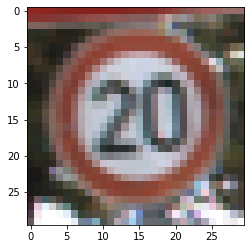

In [6]:
img_path = "0/00000_00001_00029.png"
path = os.path.join(cur_path,'train',str(img_path))
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [7]:
def build_model():
    #Building the model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(43, activation='softmax'))
    
    return model

In [8]:
model = build_model()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 58s 58ms/step - loss: 1.3155 - accuracy: 0.6275 - val_loss: 0.2025 - val_accuracy: 0.9471
Epoch 2/10
981/981 [==============================] - 60s 61ms/step - loss: 0.2489 - accuracy: 0.9251 - val_loss: 0.0726 - val_accuracy: 0.9799
Epoch 3/10
981/981 [==============================] - 59s 61ms/step - loss: 0.1575 - accuracy: 0.9535 - val_loss: 0.0531 - val_accuracy: 0.9857
Epoch 4/10
981/981 [==============================] - 61s 62ms/step - loss: 0.1210 - accuracy: 0.9636 - val_loss: 0.0444 - val_accuracy: 0.9864
Epoch 5/10
981/981 [==============================] - 66s 67ms/step - loss: 0.1018 - accuracy: 0.9706 - val_loss: 0.0394 - val_accuracy: 0.9899
Epoch 6/10
981/981 [==============================] - 63s 64ms/step - loss: 0.0856 - accuracy: 0.9733 - val_loss: 0.0345 - val_accuracy: 0.9921
Epoch 7/10
981/981 [==============================] - 60s 61ms/step - loss: 0.0806 - accuracy: 0.9770 - val_loss: 0.0359 - val_accuracy:

In [12]:
model.save("trafficsignNN_normalised.h5")

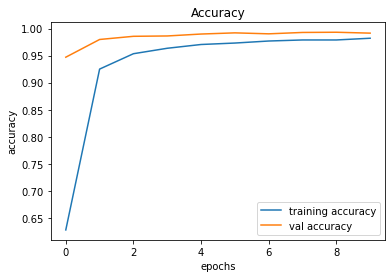

In [13]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

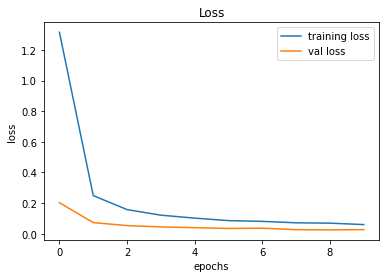

In [14]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

In [16]:
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

KeyboardInterrupt: 

In [18]:
pred = model.predict(X_test)
classes_pred=np.argmax(pred,axis=1)
print(accuracy_score(y_test, classes_pred))

ValueError: Found input variables with inconsistent numbers of samples: [12630, 7842]

In [1]:
num = 1000

def display_prediction(num):
    print("Image")
    image = Image.open(imgs[num])
    image = image.resize((30,30))
    plt.imshow(image)
    plt.show()

    print("Predicted class: ")
    class_path = os.path.join(cur_path,'meta',str(classes_pred[num]))
    image = Image.open(class_path+'.png')
    image = image.resize((30,30))
    plt.imshow(image)
    plt.show()
    
for i in range(0,30):
    display_prediction(i)

Image


NameError: name 'Image' is not defined